In [ ]:
!python --version

Python 3.7.13


In [ ]:
tf.__version__

'2.8.2'

In [ ]:
keras.__version__

'2.8.0'

In [ ]:
np.__version__

'1.21.6'

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten, Dropout
warnings.filterwarnings('ignore')

In [ ]:
test =pd.read_csv('/content/drive/MyDrive/data_test_24-29.csv')
train = pd.read_csv('/content/drive/MyDrive/data_train_24-29.csv')

train

,Ax,Ay,Az,Gx,Gy,Gz,Lat,Long,Speed,Time,T,TIME IN GMT,TIME IN IST,Date,Label
0,-0.10,0.01,1.30,4.46,24.96,3.97,17.445822,78.350881,1.14,12171600.0,121716.0,12:17:16 PM,5:47:16 PM,291021.0,STRAIGHT
1,0.13,-0.07,1.24,0.92,21.73,4.70,17.445822,78.350881,1.14,12171600.0,121716.0,12:17:16 PM,5:47:16 PM,291021.0,STRAIGHT
2,-0.07,0.08,1.18,5.19,21.97,5.00,17.445822,78.350881,1.14,12171600.0,121716.0,12:17:16 PM,5:47:16 PM,291021.0,STRAIGHT
3,0.20,-0.07,1.22,0.55,21.24,5.98,17.445822,78.350881,1.14,12171600.0,121716.0,12:17:16 PM,5:47:16 PM,291021.0,STRAIGHT
4,-0.16,0.05,1.08,1.59,21.55,6.41,17.445822,78.350881,1.14,12171600.0,121716.0,12:17:16 PM,5:47:16 PM,291021.0,STRAIGHT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
222849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
222850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
222851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train_data = train.drop(['TIME IN GMT','TIME IN IST','Lat ','Long', 'Time','T','Date'], axis=1)
test_data = test.drop(['TIME IN GMT','TIME IN IST','Lat ','Long', 'Time','T','Date'], axis=1)

train_data

,Ax,Ay,Az,Gx,Gy,Gz,Speed,Label
0,-0.10,0.01,1.30,4.46,24.96,3.97,1.14,STRAIGHT
1,0.13,-0.07,1.24,0.92,21.73,4.70,1.14,STRAIGHT
2,-0.07,0.08,1.18,5.19,21.97,5.00,1.14,STRAIGHT
3,0.20,-0.07,1.22,0.55,21.24,5.98,1.14,STRAIGHT
4,-0.16,0.05,1.08,1.59,21.55,6.41,1.14,STRAIGHT
...,...,...,...,...,...,...,...,...
222848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
222849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
222850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
222851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train_data.dropna(axis=0, how='any', inplace=True)
train_data.shape

(178283, 8)

In [ ]:
test_data.dropna(axis=0, how='any', inplace=True)
test_data.shape

(44574, 8)

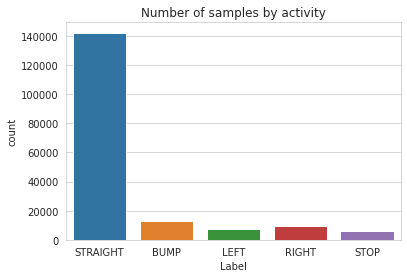

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x = 'Label', data = train_data)
plt.title('Number of samples by activity')
plt.show()

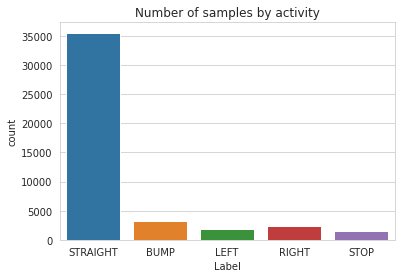

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x = 'Label', data = test_data)
plt.title('Number of samples by activity')
plt.show()

In [ ]:
train_data.shape

(178283, 8)

In [ ]:
n_time_steps = 104
n_features = 7 
step = 104
n_classes = 5 
n_epochs = 50       
batch_size = 32   
learning_rate = 0.0001
l2_loss = 0.0015

segments = []
labels = []


In [ ]:
for i in range(0,  train_data.shape[0]- n_time_steps, step):  

    Ax_tr = train_data['Ax'].values[i: i + n_time_steps]

    Ay_tr = train_data['Ay'].values[i: i + n_time_steps]

    Az_tr = train_data['Az'].values[i: i + n_time_steps]

    Gx_tr = train_data['Gx'].values[i: i + n_time_steps]

    Gy_tr = train_data['Gy'].values[i: i + n_time_steps]

    Gz_tr = train_data['Gz'].values[i: i + n_time_steps]

    Speed_tr = train_data['Speed'].values[i: i + n_time_steps]


    label_tr = stats.mode(train_data['Label'][i: i + n_time_steps])[0][0]

    segments.append([Ax_tr, Ay_tr, Az_tr, Gx_tr,Gy_tr,Gz_tr,Speed_tr])

    labels.append(label_tr)

In [ ]:
X_train = np.asarray(segments, dtype= np.float32).reshape(-1, n_time_steps, n_features)

y_train = np.asarray(pd.get_dummies(labels), dtype = np.float32)

X_train.shape

(1714, 104, 7)

In [ ]:
reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, n_time_steps, n_features)

In [ ]:
labels = np.asarray(pd.get_dummies(labels), dtype = np.float32)

reshaped_segments.shape

(1714, 104, 7)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(reshaped_segments, labels, test_size = 0.25)


In [ ]:
y_train.shape[1]

5

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten, Dropout

model = Sequential()
# RNN layer
model.add(LSTM(units = 100, input_shape = (X_train.shape[1], X_train.shape[2])))

# Dropout layer
model.add(Dropout(0.4))
 
# Dense layer with ReLu
model.add(Dense(units = 32, activation='tanh'))

# Softmax layer
model.add(Dense(y_train.shape[1], activation = 'softplus'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               43200     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 32)                3232      
                                                                 
 dense_1 (Dense)             (None, 5)                 165       
                                                                 
Total params: 46,597
Trainable params: 46,597
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten, Dropout

model = Sequential()
# RNN layer
model.add(LSTM(units = 59, input_shape = (X_train.shape[1], X_train.shape[2])))

# Dropout layer
model.add(Dropout(0.4))
 
# Dense layer with ReLu
#model.add(Dense(units = 32, activation='tanh'))

# Softmax layer
model.add(Dense(y_train.shape[1], activation = 'softplus'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 59)                15812     
                                                                 
 dropout_1 (Dropout)         (None, 59)                0         
                                                                 
 dense_2 (Dense)             (None, 5)                 300       
                                                                 
Total params: 16,112
Trainable params: 16,112
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(X_test.shape)
print(y_test.shape)

(429, 104, 7)
(429, 5)


In [ ]:
y_test[1]

array([0., 0., 0., 0., 1.], dtype=float32)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
cp = ModelCheckpoint('model1', save_best_only = True, save_weight_only = False)
history = model.fit(X_train, y_train, epochs = n_epochs, validation_data = (X_test, y_test), batch_size = batch_size, verbose = 1, callbacks=[cp])

#history = model.fit(X_train, y_train, epochs = n_epochs, validation_data = (X_test, y_test), batch_size = batch_size, verbose = 1)


Epoch 1/50
40/41 [============================>.] - ETA: 0s - loss: 0.9559 - accuracy: 0.6938

41/41 [==============================] - 10s 181ms/step - loss: 0.9565 - accuracy: 0.6934 - val_loss: 0.6587 - val_accuracy: 0.8322
Epoch 2/50
41/41 [==============================] - ETA: 0s - loss: 0.6979 - accuracy: 0.8288

41/41 [==============================] - 7s 166ms/step - loss: 0.6979 - accuracy: 0.8288 - val_loss: 0.6197 - val_accuracy: 0.8368
Epoch 3/50
40/41 [============================>.] - ETA: 0s - loss: 0.6476 - accuracy: 0.8281

41/41 [==============================] - 7s 164ms/step - loss: 0.6459 - accuracy: 0.8288 - val_loss: 0.5973 - val_accuracy: 0.8368
Epoch 4/50
41/41 [==============================] - ETA: 0s - loss: 0.6287 - accuracy: 0.8280

41/41 [==============================] - 6s 157ms/step - loss: 0.6287 - accuracy: 0.8280 - val_loss: 0.5446 - val_accuracy: 0.8345
Epoch 5/50
41/41 [==============================] - ETA: 0s - loss: 0.5280 - accuracy: 0.8296

41/41 [==============================] - 11s 280ms/step - loss: 0.5280 - accuracy: 0.8296 - val_loss: 0.4437 - val_accuracy: 0.8368
Epoch 6/50
40/41 [============================>.] - ETA: 0s - loss: 0.4701 - accuracy: 0.8375

41/41 [==============================] - 13s 310ms/step - loss: 0.4706 - accuracy: 0.8366 - val_loss: 0.4017 - val_accuracy: 0.8368
Epoch 7/50
41/41 [==============================] - ETA: 0s - loss: 0.4306 - accuracy: 0.8506

41/41 [==============================] - 10s 260ms/step - loss: 0.4306 - accuracy: 0.8506 - val_loss: 0.3834 - val_accuracy: 0.8765
Epoch 8/50
40/41 [============================>.] - ETA: 0s - loss: 0.4026 - accuracy: 0.8570

41/41 [==============================] - 7s 169ms/step - loss: 0.4045 - accuracy: 0.8568 - val_loss: 0.3787 - val_accuracy: 0.8788
Epoch 9/50
41/41 [==============================] - ETA: 0s - loss: 0.3829 - accuracy: 0.8693

41/41 [==============================] - 6s 160ms/step - loss: 0.3829 - accuracy: 0.8693 - val_loss: 0.3488 - val_accuracy: 0.8765
Epoch 10/50
41/41 [==============================] - 2s 55ms/step - loss: 0.3792 - accuracy: 0.8669 - val_loss: 0.3548 - val_accuracy: 0.8788
Epoch 11/50
41/41 [==============================] - 2s 54ms/step - loss: 0.3842 - accuracy: 0.8802 - val_loss: 0.3694 - val_accuracy: 0.8811
Epoch 12/50
41/41 [==============================] - ETA: 0s - loss: 0.3568 - accuracy: 0.8732

41/41 [==============================] - 7s 170ms/step - loss: 0.3568 - accuracy: 0.8732 - val_loss: 0.3443 - val_accuracy: 0.8998
Epoch 13/50
40/41 [============================>.] - ETA: 0s - loss: 0.3231 - accuracy: 0.8852

41/41 [==============================] - 6s 159ms/step - loss: 0.3225 - accuracy: 0.8856 - val_loss: 0.3318 - val_accuracy: 0.8928
Epoch 14/50
41/41 [==============================] - 2s 56ms/step - loss: 0.4259 - accuracy: 0.8436 - val_loss: 0.3571 - val_accuracy: 0.8718
Epoch 15/50
40/41 [============================>.] - ETA: 0s - loss: 0.3748 - accuracy: 0.8602

41/41 [==============================] - 7s 170ms/step - loss: 0.3745 - accuracy: 0.8607 - val_loss: 0.3298 - val_accuracy: 0.8765
Epoch 16/50
40/41 [============================>.] - ETA: 0s - loss: 0.3209 - accuracy: 0.8836

41/41 [==============================] - 7s 169ms/step - loss: 0.3236 - accuracy: 0.8833 - val_loss: 0.3069 - val_accuracy: 0.8881
Epoch 17/50
40/41 [============================>.] - ETA: 0s - loss: 0.3000 - accuracy: 0.8930

41/41 [==============================] - 6s 157ms/step - loss: 0.2994 - accuracy: 0.8934 - val_loss: 0.2973 - val_accuracy: 0.9091
Epoch 18/50
41/41 [==============================] - ETA: 0s - loss: 0.2966 - accuracy: 0.8965

41/41 [==============================] - 7s 168ms/step - loss: 0.2966 - accuracy: 0.8965 - val_loss: 0.2905 - val_accuracy: 0.9021
Epoch 19/50
41/41 [==============================] - 2s 52ms/step - loss: 0.2775 - accuracy: 0.9035 - val_loss: 0.2915 - val_accuracy: 0.9021
Epoch 20/50
40/41 [============================>.] - ETA: 0s - loss: 0.2784 - accuracy: 0.9023

41/41 [==============================] - 7s 168ms/step - loss: 0.2780 - accuracy: 0.9027 - val_loss: 0.2810 - val_accuracy: 0.9138
Epoch 21/50
41/41 [==============================] - ETA: 0s - loss: 0.2661 - accuracy: 0.9066

41/41 [==============================] - 8s 206ms/step - loss: 0.2661 - accuracy: 0.9066 - val_loss: 0.2753 - val_accuracy: 0.9091
Epoch 22/50
41/41 [==============================] - 2s 53ms/step - loss: 0.2543 - accuracy: 0.9167 - val_loss: 0.2851 - val_accuracy: 0.9254
Epoch 23/50
41/41 [==============================] - 2s 53ms/step - loss: 0.2750 - accuracy: 0.9152 - val_loss: 0.3096 - val_accuracy: 0.9091
Epoch 24/50
41/41 [==============================] - ETA: 0s - loss: 0.2543 - accuracy: 0.9144

41/41 [==============================] - 7s 168ms/step - loss: 0.2543 - accuracy: 0.9144 - val_loss: 0.2696 - val_accuracy: 0.9161
Epoch 25/50
41/41 [==============================] - ETA: 0s - loss: 0.2514 - accuracy: 0.9222

41/41 [==============================] - 7s 165ms/step - loss: 0.2514 - accuracy: 0.9222 - val_loss: 0.2622 - val_accuracy: 0.8974
Epoch 26/50
41/41 [==============================] - 2s 54ms/step - loss: 0.2161 - accuracy: 0.9393 - val_loss: 0.2647 - val_accuracy: 0.9114
Epoch 27/50
41/41 [==============================] - 2s 53ms/step - loss: 0.1961 - accuracy: 0.9494 - val_loss: 0.2685 - val_accuracy: 0.9277
Epoch 28/50
40/41 [============================>.] - ETA: 0s - loss: 0.1887 - accuracy: 0.9461

41/41 [==============================] - 6s 156ms/step - loss: 0.1915 - accuracy: 0.9455 - val_loss: 0.2530 - val_accuracy: 0.9231
Epoch 29/50
41/41 [==============================] - 2s 54ms/step - loss: 0.2072 - accuracy: 0.9416 - val_loss: 0.2662 - val_accuracy: 0.9231
Epoch 30/50
41/41 [==============================] - 2s 51ms/step - loss: 0.1784 - accuracy: 0.9580 - val_loss: 0.2589 - val_accuracy: 0.9231
Epoch 31/50
41/41 [==============================] - 2s 54ms/step - loss: 0.2096 - accuracy: 0.9346 - val_loss: 0.2683 - val_accuracy: 0.9207
Epoch 32/50
41/41 [==============================] - ETA: 0s - loss: 0.1901 - accuracy: 0.9471

41/41 [==============================] - 7s 168ms/step - loss: 0.1901 - accuracy: 0.9471 - val_loss: 0.2428 - val_accuracy: 0.9301
Epoch 33/50
41/41 [==============================] - 2s 54ms/step - loss: 0.1706 - accuracy: 0.9556 - val_loss: 0.2710 - val_accuracy: 0.9277
Epoch 34/50
41/41 [==============================] - 2s 54ms/step - loss: 0.1774 - accuracy: 0.9486 - val_loss: 0.2534 - val_accuracy: 0.9277
Epoch 35/50
41/41 [==============================] - 2s 55ms/step - loss: 0.1531 - accuracy: 0.9588 - val_loss: 0.2455 - val_accuracy: 0.9207
Epoch 36/50
41/41 [==============================] - 2s 55ms/step - loss: 0.1438 - accuracy: 0.9564 - val_loss: 0.2555 - val_accuracy: 0.9138
Epoch 37/50
41/41 [==============================] - 2s 52ms/step - loss: 0.2280 - accuracy: 0.9276 - val_loss: 0.2458 - val_accuracy: 0.9231
Epoch 38/50
41/41 [==============================] - 2s 56ms/step - loss: 0.1555 - accuracy: 0.9533 - val_loss: 0.2553 - val_accuracy: 0.9021
Epoch 39/50
41/41

41/41 [==============================] - 7s 165ms/step - loss: 0.1643 - accuracy: 0.9486 - val_loss: 0.2387 - val_accuracy: 0.9347
Epoch 41/50
41/41 [==============================] - 2s 54ms/step - loss: 0.1504 - accuracy: 0.9510 - val_loss: 0.2489 - val_accuracy: 0.9231
Epoch 42/50
41/41 [==============================] - 2s 53ms/step - loss: 0.1309 - accuracy: 0.9611 - val_loss: 0.2890 - val_accuracy: 0.8951
Epoch 43/50
41/41 [==============================] - 2s 54ms/step - loss: 0.1520 - accuracy: 0.9533 - val_loss: 0.2428 - val_accuracy: 0.9231
Epoch 44/50
41/41 [==============================] - 2s 52ms/step - loss: 0.1212 - accuracy: 0.9689 - val_loss: 0.2601 - val_accuracy: 0.9161
Epoch 45/50
41/41 [==============================] - 2s 55ms/step - loss: 0.1286 - accuracy: 0.9665 - val_loss: 0.2506 - val_accuracy: 0.9277
Epoch 46/50
41/41 [==============================] - 2s 55ms/step - loss: 0.1055 - accuracy: 0.9743 - val_loss: 0.2478 - val_accuracy: 0.9371
Epoch 47/50
41/41

In [ ]:
model.save('/content/drive/MyDrive/Bike_model_LSTM')

In [ ]:
from tensorflow.keras.models import load_model

model1 = load_model('/content/model1')


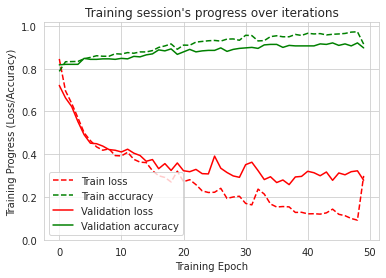

In [ ]:
plt.plot(np.array(history.history['loss']), "r--", label = "Train loss")
plt.plot(np.array(history.history['accuracy']), "g--", label = "Train accuracy")
plt.plot(np.array(history.history['val_loss']), "r-", label = "Validation loss")
plt.plot(np.array(history.history['val_accuracy']), "g-", label = "Validation accuracy")
plt.title("Training session's progress over iterations")
plt.legend(loc='lower left')
plt.ylabel('Training Progress (Loss/Accuracy)')
plt.xlabel('Training Epoch')
plt.ylim(0) 
plt.show()

In [ ]:
loss, accuracy = model1.evaluate(X_test, y_test, batch_size = batch_size, verbose = 1)
print("Test Accuracy :", accuracy)
print("Test Loss :", loss)

14/14 [==============================] - 1s 14ms/step - loss: 0.2580 - accuracy: 0.9091
Test Accuracy : 0.9090909361839294
Test Loss : 0.25803762674331665


DO NOT RUN CODE GIVEN BELOW